# Lab 6: Cleaning Data

**Objective**
1. Formulate a research question answerable by a dataset
2. Manipulate the dataset and create a data visualization to answer a research question
3. Summarize the steps of the data cleaning process and hypothesize about the importance of cleaning


**Rubric**
- 4 points: Complete the Jupyter Notebook as described. Analysis and written portions are completed in a professional manner. Use complete sentences and correct grammar.
- 3 points: Completes only some of the Jupyter Notebook as described, or submission does not meet professionalism standards.
- 2 points: Missing or incomplete

---
## Write your question

1. Create an account/login to [Kaggle](https://www.kaggle.com/)
2. Choose a dataset you are interested in (https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data)
3. Write a research question you can answer by creating a data visualization(graph). Be specific! Make sure your question is actually something your dataset can answer. You will probably need to do some research into how the data was collected in order to write your specific question

**Question:** What were the 10 most popular songs on Spotify in the past year 

## Import and explore the data

4. Import your dataset


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
df = pd.read_csv("Popular_Spotify_Songs.csv", encoding='latin-1')
df

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                  147  141381703                  43  ...  125   B  Major   
1                   48  133716286                  48  ...   92  C#  Major   
2                  113  140003974                  94  ...  138   F  Major   
3                  100  800840817                 116  ...  170   A  Major   
4                   50  303236322                  84  ...  144   A  Minor   
..                 ...        ...                 ...  ...  ...  ..    ...   
948                  0   91473363                  61  ...  144   A  Major   
949                  0  121871870                   4  ...  166  F#  Major   
950                  0   73513683                   2  ...   92  C#  Major   
951                  0  133895612                  29  ...   97  C#  Major   
952                  2   96007391                  27  ...   90   E  Minor   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0               80         89       83             31                   0   
1               71         61       74              7                   0   
2               51         32       53             17                   0   
3               55         58       72             11                   0   
4               65         23       80             14                  63   
..             ...        ...      ...            ...                 ...   
948             60         24       39             57                   0   
949             42          7       24             83                   1   
950             80         81       67              4                   0   
951             82         67       77              8                   0   
952             61         32       67             15                   0   

     liveness_%  speechiness_%  
0             8              4  
1            10              4  
2            31              6  
3            11             15  
4            11              6  
..          ...            ...  
948           8              3  
949          12              6  
950           8              6  
951         

5. Explain each of the columns in your dataset 
- track_name is the name of the song
- artist(s)_name is the names of the artists on the song
- artist_count is the amount of artists on the song
- released_year is the year the song was released
- released_month is the month (in numbers) that the song was released
- released_day is the day of the monnth that the song was released
- in_spotify_playlists is the amount of spotify playlists that the song is present in
- in_spotify_charts is the amount of spotify charts that the song appeared on
- streams is the amount fo times the song has been listened to
- in_apple_playlists is the amount of apple music playlists the song is present in
- in_apple_charts is the amount of apple charts that the song appeared on
- in_deezer_playlists is the amount of deezer playlists that the song is present in
- in_deezer_charts is the amount of deezer charts that the song appeared on 
- in_shazam_charts is the amount of shazam charts that the song appeared on
- bpm is the bpm that the song is in
- key is the key that the song is in
- mode is whether the song is in a major key or a minor key
- danceability_% is how suitable a song is for dancing to
- valence_% is how positive the song is
- energy_% is how intense the music is
- acousticness_% is how acoustic the song is
- instrumentalness_% is how few vocals there are on a song
- liveness_% is how likely it is that the track was performed live
- speechiness_% is how much spoken words were on the song

Show the data types for each column. If they do not match what you anticipated, change the datatypes so they make sense.

In [212]:
df.drop(df.index[574], inplace=True) #getting rid of a data point that had data that didn't make sense
df['streams'] = pd.to_numeric(df['streams'])
df = df.reset_index()
df


index                           track_name      artist(s)_name  \
0        0  Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook   
1        1                                 LALA         Myke Towers   
2        2                              vampire      Olivia Rodrigo   
3        3                         Cruel Summer        Taylor Swift   
4        4                       WHERE SHE GOES           Bad Bunny   
..     ...                                  ...                 ...   
947    948                         My Mind & Me        Selena Gomez   
948    949            Bigger Than The Whole Sky        Taylor Swift   
949    950                 A Veces (feat. Feid)  Feid, Paulo Londra   
950    951                        En La De Ella  Feid, Sech, Jhayco   
951    952                                Alone           Burna Boy   

     artist_count  released_year  released_month  released_day  \
0               2           2023               7            14   
1               1           2023               3            23   
2               1           2023               6            30   
3               1           2019               8            23   
4               1           2023               5            18   
..            ...            ...             ...           ...   
947             1           2022              11             3   
948             1           2022              10            21   
949             2           2022              11             3   
950             3           2022              10            20   
951             1           2022              11             4   

     in_spotify_playlists  in_spotify_charts    streams  ...  bpm  key   mode  \
0                     553                147  141381703  ...  125    B  Major   
1                    1474                 48  133716286  ...   92   C#  Major   
2                    1397                113  140003974  ...  138    F  Major   
3                    7858                100  800840817  ...  170    A  Major   
4                    3133                 50  303236322  ...  144    A  Minor   
..                    ...                ...        ...  ...  ...  ...    ...   
947                   953                  0   91473363  ...  144    A  Major   
948                  1180                  0  121871870  ...  166   F#  Major   
949                   573                  0   73513683  ...   92   C#  Major   
950                  1320                  0  133895612  ...   97   C#  Major   
951                   782                  2   96007391  ...   90    E  Minor   

     danceability_% valence_%  energy_% acousticness_% instrumentalness_%  \
0                80        89        83             31                  0   
1                71        61        74              7                  0   
2                51        32        53             17                  0   
3                55        58        72             11                  0   
4                65        23        80             14                 63   
..              ...       ...       ...            ...                ...   
947              60        24        39             57                  0   
948              42         7        24             83                  1   
949              80        81        67              4                  0   
950              82        67        77              8                  0   
951              61        32        67             15                  0   

     liveness_%  speechiness_%  
0             8              4  
1            10              4  
2            31              6  
3            11             15  
4            11              6  
..          ...            ...  
947           8              3  
948          12              6  
949           8              6  
950          12              5  
951          11              5  

[952 rows x 25 columns]

6. Check your dataset for missing or incomplete data.

How many rows and columns are there?

In [213]:
print(f'{df.isnull().sum().sum()} {df.shape}')

145 (952, 25)


Do you need all of the rows/columns for the data visualization you are making? Remove the extra rows/columns.

In [214]:
#getting rid of cloumns I don't plan on using
df = df.drop(['index', 'artist_count', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis=1)
a = df.loc[df['released_year'] == 2023] #getting rid of any rows that aren't in the year that I want to look at
a

track_name  \
0    Seven (feat. Latto) (Explicit Ver.)   
1                                   LALA   
2                                vampire   
4                         WHERE SHE GOES   
5                               Sprinter   
..                                   ...   
381         I'm Not Here To Make Friends   
382                            TRUSTFALL   
385            VIBE (feat. Jimin of BTS)   
398                             Muï¿½ï¿½   
404                      Sugar Rush Ride   

                             artist(s)_name  released_year    streams  
0                          Latto, Jung Kook           2023  141381703  
1                               Myke Towers           2023  133716286  
2                            Olivia Rodrigo           2023  140003974  
4                                 Bad Bunny           2023  303236322  
5                         Dave, Central Cee           2023  183706234  
..                                      ...            ...        ...  
381  Sam Smith, Calvin Harris, Jessie Reyez           2023  103787664  
382                                    P!nk           2023  134255790  
385                          TAEYANG, Jimin           2023  152850295  
398             Steve Aoki, Tini, La Joaqui           2023  120972253  
404                     TOMORROW X TOGETHER           2023  107642809  

[175 rows x 4 columns]

How many data points are in each row? Is there any missing data in your table? If so, how do you want to address the missing data?

In [215]:
#4
a.isnull().sum().sum()

0

Does your data include any null values(or something in place of null values)? Replace those characters with `np.nan` values.

In [216]:
#no

Does your data have any duplicate values? You will probably want to use `df.duplicated()`.

In [217]:
a.duplicated().sum().sum()

0

Compute the mean and a 5 number summary for the numeric columns. Do the numbers you are getting make sense? If not, what adjustments do you need to make to your data?

In [218]:
a.describe()

released_year       streams
count          175.0  1.750000e+02
mean          2023.0  1.474771e+08
std              0.0  1.542564e+08
min           2023.0  1.159939e+07
25%           2023.0  5.962073e+07
50%           2023.0  1.077538e+08
75%           2023.0  1.642359e+08
max           2023.0  1.316856e+09

Column-by-column, check your data for outliers. 
- For numeric columns: create a box and whisker plot for the column. Are there any outliers?
- For categorical data: group the data by catergory. How many data points are in each category? Do you have extra categories you weren't anticipating?

You don't need to do this for columns you are keeping in your `DataFrame` to label the data(Ex: You wanted to make a graph of movie budget to critics rating. You might keep the movie titles as an additional column, but don't need to check them for outliers) 

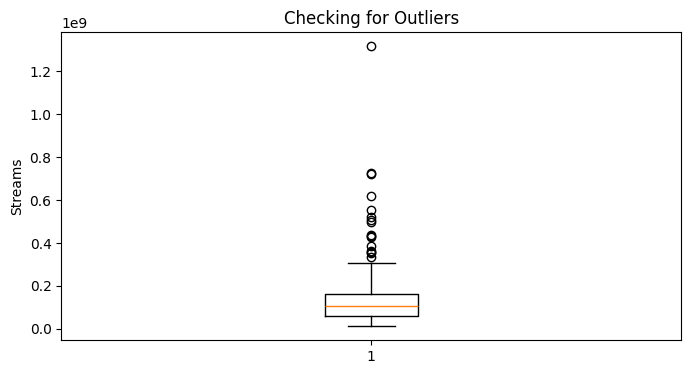

In [219]:
plt.figure(figsize=(8, 4))
plt.boxplot(a['streams'])
plt.title('Checking for Outliers')
plt.ylabel('Streams')
plt.show()

## Create your data visualization

7. Create your graph using `matplotlib` in the space below. Make sure you include our three required features of graphs.

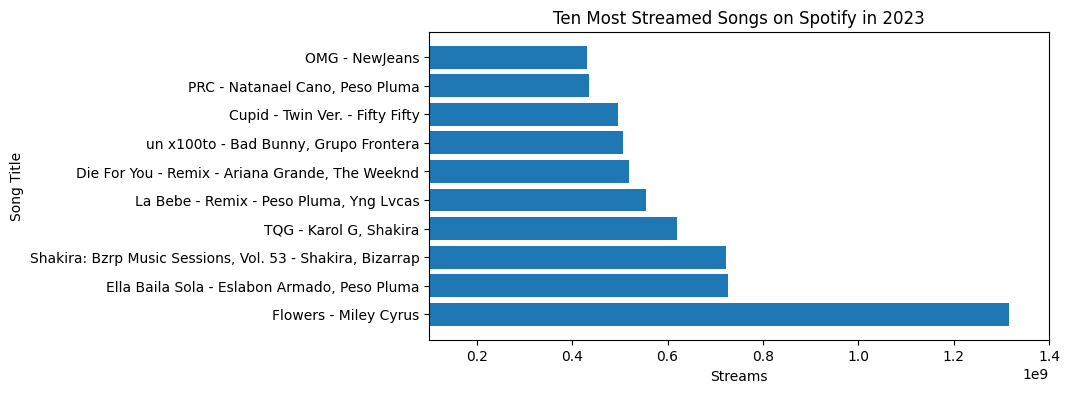

In [235]:
a['title_and_artist'] = a['track_name']+' - '+a['artist(s)_name'] #combining the titles and artist names so the graph is a little easier to understand
a = a.sort_values('streams', ascending=False) #sorting the rows by streams highest to lowest
plt.figure(figsize=(8, 4))
plt.barh(a['title_and_artist'].head(10), a['streams'].head(10)) #displaying the 10 highest values
plt.title('Ten Most Streamed Songs on Spotify in 2023')
plt.xlabel('Streams')
plt.ylabel('Song Title')
plt.xlim(99999999,1400000000)
plt.show()

## Wrap-Up

What were the steps you took to make your data usable, between importing and graphing? 

- Getting rid of bad and irrelevant data
- Making data more understandable such as combining the title and artist name
- Changing data types so they are easier to use

Why is it important to clean and examine our data before using it? 
It is important to clean and examine our data before using it because that will allow us to better understand how to display our data and it will make the data more clear. Showing null values on a graph would be really difficult to understand and not provide much value
